In [1]:
# Load the dataset into a dataframe using pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Raw_data\dataset.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [2]:
# Get a sense of the size of the datasest
df.shape

(1460, 81)

In [3]:
# Summarize columns with missing values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis = 0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis = 1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending = False).round(1)
        print ("There are " + str(mz_table.shape[0]) + " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PoolQC,0,1453,99.5,1453,99.5,object
MiscFeature,0,1406,96.3,1406,96.3,object
Alley,0,1369,93.8,1369,93.8,object
Fence,0,1179,80.8,1179,80.8,object
FireplaceQu,0,690,47.3,690,47.3,object
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object


### Data Cleaning

In [4]:
# Drop columns containing less than 60% non-null values
df.dropna(thresh = df.shape[0]*0.6, how = 'all', inplace = True, axis=1)
df.shape

(1460, 76)

MasVnrArea_median value =  0.0


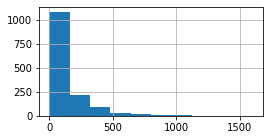

In [5]:
# Check the value distribution in MasVnrArea, which has 861 zero values.  
plt.figure(figsize=(4,2))
df['MasVnrArea'].hist()
print('MasVnrArea_median value = ', df['MasVnrArea'].median())

In [6]:
# Data in MasVnrArea column are largely zeros and unlikely to be useful.  Thus will be dropped.
df.drop(['MasVnrArea'], axis = 1, inplace = True)
missing_zero_values_table(df)

There are 13 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
LotFrontage,0,259,17.7,259,17.7,float64
GarageType,0,81,5.5,81,5.5,object
GarageYrBlt,0,81,5.5,81,5.5,float64
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object


In [7]:
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [8]:
# Fill null values in LotFrontage column with the average value
df['LotFrontage'].fillna((df['LotFrontage'].mean()), inplace = True)
df['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

The LotFrontage column has the most null value after dropping columns with more than 60% null values. Replacing NA values with the average did not change the mean for the column, thus it is a reasonable approach to preserve the column for later analysis.

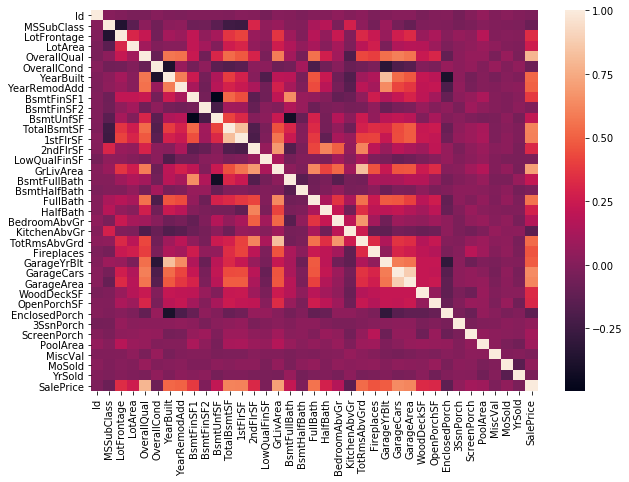

In [9]:
# Check correlations among columns
corr = df.corr()

# Plot heatmap for corr
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(corr)

In [10]:
# Find highly correlated columns
s = corr.unstack()
so = s.sort_values(ascending = False)
so[so!=1].head(15)

GarageCars    GarageArea      0.882475
GarageArea    GarageCars      0.882475
YearBuilt     GarageYrBlt     0.825667
GarageYrBlt   YearBuilt       0.825667
TotRmsAbvGrd  GrLivArea       0.825489
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
1stFlrSF      TotalBsmtSF     0.819530
OverallQual   SalePrice       0.790982
SalePrice     OverallQual     0.790982
GrLivArea     SalePrice       0.708624
SalePrice     GrLivArea       0.708624
2ndFlrSF      GrLivArea       0.687501
GrLivArea     2ndFlrSF        0.687501
TotRmsAbvGrd  BedroomAbvGr    0.676620
dtype: float64

```Based on the values and description of the data, the first eight pairs are likely duplicate data. For example,
   GarageCars indicates the "Size of garage in car capacity" while GarageArea indicates the "Size of garage in square   feet", they are just different ways to measure the size of the garage.  
   The same is likely holds true for YearBuilt&GarageYrBlt, TotalBsmtSF&1stFlrSF, TotRmsAbvGrd&GrLivArea.  
   Continue down the list, 2ndFlrSF, BedroomAbvGr, BsmtFinSF1 are also likely to have similar information as their pairs.
   Based on this analysis, these columns will be dropped: ['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd',2ndFlrSF, BedroomAbvGr, BsmtFinSF1]. ```

In [11]:
df = df.drop(['GarageCars','GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1'], axis = 1)

In [12]:
# Check for missing values again
missing_zero_values_table(df)

There are 11 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageType,0,81,5.5,81,5.5,object
GarageFinish,0,81,5.5,81,5.5,object
GarageQual,0,81,5.5,81,5.5,object
GarageCond,0,81,5.5,81,5.5,object
BsmtExposure,0,38,2.6,38,2.6,object
BsmtFinType2,0,38,2.6,38,2.6,object
BsmtQual,0,37,2.5,37,2.5,object
BsmtCond,0,37,2.5,37,2.5,object
BsmtFinType1,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object


In [13]:
"""Among the four columns related to Garage that still have missing values, "GarageType" refers to the Garage 
   location, "GarageFinish" refers to the Interior finish of the garage, "GarageQual" refers to Garage quality,
   "GarageCond" refers to Garage condition.  It seems that "GarageCond" should be a sufficient parameter to evalute 
   the garage condition. """

df = df.drop(['GarageType', 'GarageFinish', 'GarageQual'], axis = 1)

In [14]:
""" Among the five columns related to basement that still have missing values, "BsmtExposure" refers to walkout or 
    garden level walls, "BsmtFinType2" is the rating of basement finished area (if multiple types), "BsmtQual" 
    evaluates the height of the basement, "BsmtCond" evaluates the general condition of the basement, 
    "BsmtFinType1" is the rating of basement finished area.  It seems that "BsmtCond" should be a sufficient 
    parameter to evalute the basement condition. """

df = df.drop(['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1'], axis = 1)

In [15]:
# Check for missing values again
missing_zero_values_table(df)

There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
GarageCond,0,81,5.5,81,5.5,object
BsmtCond,0,37,2.5,37,2.5,object
MasVnrType,0,8,0.5,8,0.5,object
Electrical,0,1,0.1,1,0.1,object


Since the total missing values now only comprised of less than 10% of the total data, I decided to preserve the features and drop the rows containing missing values.

In [16]:
df.dropna(inplace = True)

In [17]:
# Check for missing values
missing_zero_values_table(df)

There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [18]:
# check the size of the dataframe
df.shape

(1340, 61)

#### There are still has 61 potential features.  Check for other potential columns to drop

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1459
Data columns (total 61 columns):
Id               1340 non-null int64
MSSubClass       1340 non-null int64
MSZoning         1340 non-null object
LotFrontage      1340 non-null float64
LotArea          1340 non-null int64
Street           1340 non-null object
LotShape         1340 non-null object
LandContour      1340 non-null object
Utilities        1340 non-null object
LotConfig        1340 non-null object
LandSlope        1340 non-null object
Neighborhood     1340 non-null object
Condition1       1340 non-null object
Condition2       1340 non-null object
BldgType         1340 non-null object
HouseStyle       1340 non-null object
OverallQual      1340 non-null int64
OverallCond      1340 non-null int64
YearBuilt        1340 non-null int64
YearRemodAdd     1340 non-null int64
RoofStyle        1340 non-null object
RoofMatl         1340 non-null object
Exterior1st      1340 non-null object
Exterior2nd      1340 non

I decided to hand pick potential useful features and exclude features that may contain reducant information based on the data description.  I will also exclude features that are not likely to be important for home buyers based on my own intuiation.

In [20]:
# choose columns to keep
s_col = ['MSSubClass', 'MSZoning','LotFrontage','LotArea','LandSlope','Neighborhood','OverallQual','YearBuilt','YearRemodAdd','BsmtCond','GrLivArea','FullBath','HalfBath','KitchenQual','Fireplaces','GarageArea','GarageCond','YrSold', 'SalePrice']
df = df[s_col]
print(df.shape)

(1340, 19)


### Data transformation

YearBuilt, YearRemodAdd and YrSold alone are not as useful.  It's better to make a new column with information on
the age of the house.  If it is remodeled, the age will be calculated as from the year it was remodeled to the 
year it was sold.  

In [21]:
# Check to make sure that the dates make sense. 
c = df['YearRemodAdd'] >= df['YearBuilt']
c.value_counts()

True    1340
dtype: int64

In [22]:
# Create the new HouseAge column based on YearRemodAdd and YrSold
c = df['YearRemodAdd'] - df['YearBuilt']
df['HouseAge'] = c
df = df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1)
df.shape

(1340, 17)

In [23]:
# Check feature correlations with SalePrice
corr = df.corr()
corr['SalePrice'].abs().sort_values(ascending = False)

SalePrice      1.000000
OverallQual    0.783738
GrLivArea      0.711424
GarageArea     0.608110
FullBath       0.569488
Fireplaces     0.445613
LotFrontage    0.328168
HalfBath       0.257160
LotArea        0.254615
HouseAge       0.202945
MSSubClass     0.080331
Name: SalePrice, dtype: float64

In [24]:
# MSSubClass is poorly correlated with SalePrice, will drop it
df = df.drop(['MSSubClass'], axis = 1)

### Transforming categorical variables

In [25]:
# Learn about the non-numeric variables
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'LandSlope', 'Neighborhood', 'BsmtCond', 'KitchenQual',
       'GarageCond'],
      dtype='object')

In [26]:
df['MSZoning'].value_counts()

RL         1068
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64

In [27]:
df['LandSlope'].value_counts()

Gtl    1267
Mod      61
Sev      12
Name: LandSlope, dtype: int64

In [28]:
df['Neighborhood'].value_counts()

NAmes      209
CollgCr    147
OldTown    100
Somerst     83
Gilbert     77
NridgHt     76
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
Crawfor     50
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [29]:
df['BsmtCond'].value_counts()

TA    1239
Gd      62
Fa      38
Po       1
Name: BsmtCond, dtype: int64

In [30]:
df['KitchenQual'].value_counts()

TA    650
Gd    570
Ex     97
Fa     23
Name: KitchenQual, dtype: int64

In [31]:
df['GarageCond'].value_counts()

TA    1289
Fa      33
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

I am not familiar with the neighborhood designations and I don't have a good reference on hand to categorize them in a reasonable way in relation to housing market.  Therefore, it will be dropped.

In [32]:
df = df.drop(['Neighborhood'], axis = 1)

In [33]:
# Change string data type to categorical values
t_cols = ['MSZoning','LandSlope','BsmtCond','KitchenQual','GarageCond']
for col in t_cols:
    print(col+":", len(df[col].unique()))
    df[col] = df[col].astype('category')

MSZoning: 5
LandSlope: 3
BsmtCond: 4
KitchenQual: 4
GarageCond: 5


In [34]:
# Create dummy variable for the text columns
for col in t_cols:
    col_dummies = pd.get_dummies(df[col]).rename(columns = lambda x: col + str(x))
    df = pd.concat([df, col_dummies], axis=1)
    del df[col]

In [35]:
# Check correlation again
corr = df.corr()
cor = corr['SalePrice'].abs().sort_values(ascending = False)
cor

SalePrice          1.000000
OverallQual        0.783738
GrLivArea          0.711424
GarageArea         0.608110
FullBath           0.569488
KitchenQualTA      0.524398
KitchenQualEx      0.510276
Fireplaces         0.445613
LotFrontage        0.328168
KitchenQualGd      0.293272
MSZoningRM         0.286536
HalfBath           0.257160
LotArea            0.254615
MSZoningRL         0.244193
HouseAge           0.202945
GarageCondTA       0.150504
GarageCondFa       0.140862
BsmtCondFa         0.135256
KitchenQualFa      0.116556
MSZoningC (all)    0.106776
MSZoningFV         0.078332
GarageCondPo       0.071977
MSZoningRH         0.069556
BsmtCondGd         0.068848
LandSlopeGtl       0.060436
LandSlopeMod       0.049740
BsmtCondPo         0.041523
LandSlopeSev       0.035542
BsmtCondTA         0.034558
GarageCondEx       0.030803
GarageCondGd       0.007203
Name: SalePrice, dtype: float64

In [36]:
# Drop columns having a correlation coefficient less than 0.2
ci = cor[cor >= 0.2].index
df = df[ci]
df.shape

(1340, 15)

In [37]:
# Check correlation again
corr = df.corr()
cor = corr['SalePrice'].abs().sort_values(ascending = False)
cor

SalePrice        1.000000
OverallQual      0.783738
GrLivArea        0.711424
GarageArea       0.608110
FullBath         0.569488
KitchenQualTA    0.524398
KitchenQualEx    0.510276
Fireplaces       0.445613
LotFrontage      0.328168
KitchenQualGd    0.293272
MSZoningRM       0.286536
HalfBath         0.257160
LotArea          0.254615
MSZoningRL       0.244193
HouseAge         0.202945
Name: SalePrice, dtype: float64

## Model selection
Because there are several columns that are highly correlated with the SalePrice and because SalePrice is a continous variable, I decided to fisr employ a linear regression model to predict SalePrice.  

Text(0, 0.5, 'KitchenQualGd')

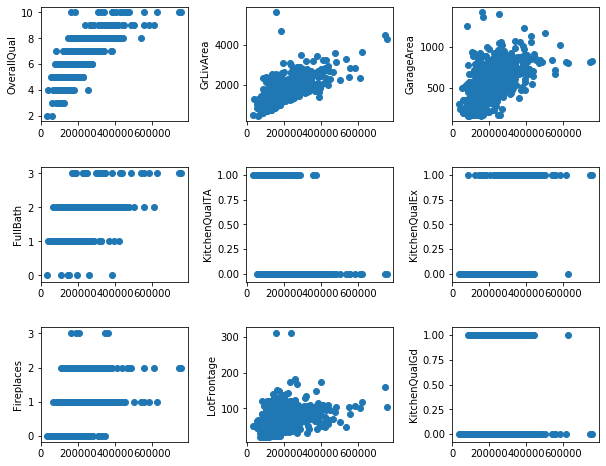

In [38]:
# Visulize the relationship between SalePrice and top correlated columns to get a sense of the data.
fig = plt.figure(figsize = (10,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(3, 3, 1)
ax1.scatter(df['SalePrice'], df['OverallQual'])
ax1.set_ylabel('OverallQual')

ax2 = fig.add_subplot(3, 3, 2)
ax2.scatter(df['SalePrice'],df['GrLivArea'])
ax2.set_ylabel('GrLivArea')

ax3 = fig.add_subplot(3, 3, 3)
ax3.scatter(df['SalePrice'],df['GarageArea'])
ax3.set_ylabel('GarageArea')

ax4 = fig.add_subplot(3, 3, 4)
ax4.scatter(df['SalePrice'],df['FullBath'])
ax4.set_ylabel('FullBath')

ax5 = fig.add_subplot(3, 3, 5)
ax5.scatter(df['SalePrice'],df['KitchenQualTA'])
ax5.set_ylabel('KitchenQualTA')

ax6 = fig.add_subplot(3, 3, 6)
ax6.scatter(df['SalePrice'],df['KitchenQualEx'])
ax6.set_ylabel('KitchenQualEx')

ax7 = fig.add_subplot(3, 3, 7)
ax7.scatter(df['SalePrice'],df['Fireplaces'])
ax7.set_ylabel('Fireplaces')

ax8 = fig.add_subplot(3, 3, 8)
ax8.scatter(df['SalePrice'],df['LotFrontage'])
ax8.set_ylabel('LotFrontage')

ax9 = fig.add_subplot(3, 3, 9)
ax9.scatter(df['SalePrice'],df['KitchenQualGd'])
ax9.set_ylabel('KitchenQualGd')

As seen above, there are at least four columns that exhibit somewhat reasonable linear relationship with  SalePrice, namely, OverallQual, GrLivArea, GarageArea and LotFrontage.  

In [39]:
# train and testing models
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

def train_and_test(train, features):
    """ This function trains a model based on a set of given features using a train data set. 
    It returns the rmse. """
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    return rmse


 elapsedTime(min,sec): (0.0, 0.093727)


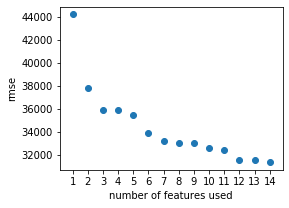

In [43]:
# Ranomize and split data to train and test data sets
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True, drop = True)

# Arbitrarily split data into train and test data sets based on 75:25 train:test split.
sp = int(df.shape[0]*0.75)
train = df[:sp]
test = df[sp:]

import datetime
time1 = datetime.datetime.now()

features = list(df.columns)[1:]
rmses = {}
for i in range(1,len(features)+1):
    t_col = features[0:i]
    rmse = train_and_test(train,t_col)
    rmse = round(rmse,2)
    rmses[i] = rmse
time2 = datetime.datetime.now() 
elapsedTime = time2 - time1
print('\n', 'elapsedTime(min,sec):', divmod(elapsedTime.total_seconds(), 60))

# converting the rmses dictionary to a dataframe
rms = pd.DataFrame(list(rmses.items()), columns = ['n_cols', 'rmse'])

# plot the rmses verses the corresponsing number of features
plt.figure(figsize =(4,3))
plt.xticks(np.arange(1,15,1))
plt.xlabel('number of features used')
plt.ylabel('rmse')
plt.scatter(x = rms['n_cols'], y = rms['rmse'])

It can be seen from above graph that the prediction error decreases as more features are included for training.  It appears that there are potential three local minimums, namely, with 3, 7 and 12 features.

It should also be noted that although data were randomized before training, it is not clear whether there might be potential bias in the data.  Therefore, k-fold cross-validation method is used below to test how changing the training sets affects the error.  

Text(0.5, 0, 'folds split')

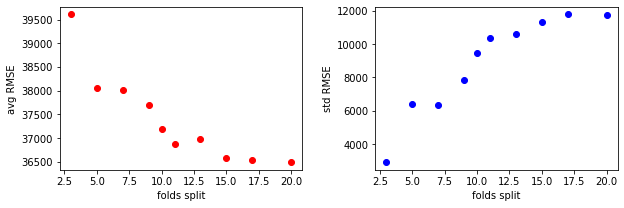

In [44]:
# Testing differnt ways to split the train and test data
from sklearn.model_selection import cross_val_score, KFold
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 20]
rmses_ls = []
std_rmse_ls = []
for fold in num_folds:
    kf = KFold(fold, shuffle = True, random_state = 1)
    lr = linear_model.LinearRegression()
    mses = cross_val_score(lr, df[features], df['SalePrice'], scoring = 'neg_mean_squared_error', cv = kf)
    rmses = np.sqrt(np.abs(mses))
    avg_rmse = np.mean(rmses)
    rmses_ls.append(avg_rmse)
    std_rmse = np.std(rmses)
    std_rmse_ls.append(std_rmse)
    
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(num_folds, rmses_ls, color = 'red', label='avg_rmse')
ax1.set_ylabel('avg RMSE')
ax1.set_xlabel('folds split')
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(num_folds, std_rmse_ls, color = 'blue', label='std_rmse')
ax2.set_ylabel('std RMSE')
ax2.set_xlabel('folds split')

```As the number of splits increases, the prediction error decreases, but the standard deviation for the errors increases, suggesting notable variance in data.  
    Given this conundrum, I will experiment by both varying the fraction of data used for training and adding more features during training to further tune the model.  
    Each model will be run multiple times to deterime the effects of data selection on model prediction. Data are randomized each time before fitting the model. ```

In [45]:
# To increase the workflow, a train_test_graph function is defined below.  

def train_test1(df, features, k, n):
    """ This function trains a model based on a set of given features.  
    It will automatically train the model n times.  The data are randomized for each run.  
    k is the fraction of data for training. """
    
    rmses =[] # record rmse for the runs
    for i in range(0,n):
        # ranmize and split data
        df = shuffle(df)
        df.reset_index(inplace = True, drop = True)
        sp = int(df.shape[0]*k)
        train = df[:sp]
        test = df[sp:]
        
        # model fitting and prediction
        lr = linear_model.LinearRegression()
        lr.fit(train[features], train['SalePrice'])
        predictions = lr.predict(test[features])
                        
        # calculating the error
        mse = mean_squared_error(test['SalePrice'], predictions)
        rmse = np.sqrt(mse)
        rmses.append(rmse)
    mean_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    return mean_rmse, std_rmse

In [49]:
# three feature experiemnts
# Exp1. Use three features and the train:test split of 90:10, 70:30 and 50:50 to train the model 20 times
feature3 = features[0:3]
mean_rmse1, std_rmse1 = train_test1(df, feature3, 0.9, 20)

# Exp2. Use three features but change the train:test split to 70:30 to train the model 20 times
mean_rmse2, std_rmse2 = train_test1(df, feature3, 0.7, 20)

# Exp3. Use three features but change the train:test split to 50:50 to train the model 20 times
mean_rmse3, std_rmse3 = train_test1(df, feature3, 0.5, 20)

In [50]:
# severn feature experiments
feature7 = features[0:7]

# Exp4. Use severn features and the train:test split of 90:10, 70:30 and 50:50 to train the model 20 times
mean_rmse4, std_rmse4 = train_test1(df, feature7, 0.9, 20)

# Exp5. Use severn features but change the train:test split to 70:30 to train the model 20 times
mean_rmse5, std_rmse5 = train_test1(df, feature7, 0.7, 20)

# Exp6. Use severn features but change the train:test split to 50:50 to train the model 20 times
mean_rmse6, std_rmse6 = train_test1(df, feature7, 0.5, 20)

In [52]:
# 12 feature experiments
feature12 = features[0:12]

# Exp4. Use severn features and the train:test split of 90:10, 70:30 and 50:50 to train the model 20 times
mean_rmse7, std_rmse7 = train_test1(df, feature12, 0.9, 20)

# Exp5. Use severn features but change the train:test split to 70:30 to train the model 20 times
mean_rmse8, std_rmse8 = train_test1(df, feature12, 0.7, 20)

# Exp6. Use severn features but change the train:test split to 50:50 to train the model 20 times
mean_rmse9, std_rmse9 = train_test1(df, feature12, 0.5, 20)

In [53]:
# Experimental summary

feature_split = ['3_90','3_70','3_50','7_90','7_70','7_50','12_90','12_70','12_50']
mean_rmses = [mean_rmse1, mean_rmse2, mean_rmse3,mean_rmse4, mean_rmse5, mean_rmse6,mean_rmse7, mean_rmse8, mean_rmse9]
std_rmses = [std_rmse1, std_rmse2, std_rmse3,std_rmse4, std_rmse5, std_rmse6,std_rmse7, std_rmse8, std_rmse9]

sum_table = pd.DataFrame(list(zip(feature_split, mean_rmses, std_rmses)), 
               columns =['feature_split','mean_rmses','std_rmses'])
sum_table

,feature_split,mean_rmses,std_rmses
0,3_90,39620.416007,8312.014795
1,3_70,42202.616074,3307.683484
2,3_50,41716.445779,2573.449887
3,7_90,37195.032162,7140.506248
4,7_70,38492.667314,3064.656164
5,7_50,38709.676555,2281.103585
6,12_90,35525.770092,9455.995883
7,12_70,38549.866427,4441.959116
8,12_50,38950.369373,3285.761177


Text(0, 0.5, 'std of rmses')

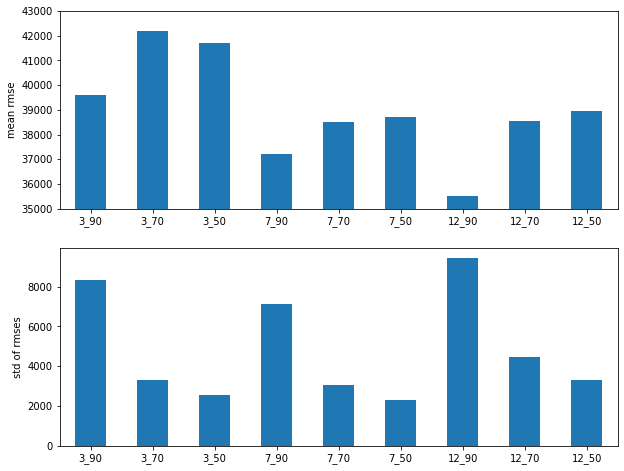

In [54]:
# Graphical representation of the summary data
fig = plt.figure(figsize = (10,8))
fig.subplots_adjust(wspace = 0.5)
ax1 = fig.add_subplot(2, 1, 1)
ax1 = sum_table['mean_rmses'].plot.bar(rot = 0)
ax1.set_xticklabels(sum_table.feature_split)
ax1.set_ylim(35000, 43000)
ax1.set_ylabel('mean rmse')

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sum_table['std_rmses'].plot.bar(rot = 0)
ax2.set_xticklabels(sum_table.feature_split)
ax2.set_ylabel('std of rmses')

Based on the above analysis, using 50:50 split resulted in more consistent errors between runs.  In the next segment, I will use a new train_test function and a same 50:50 split data set to test how error changes with increasing features. 

In [55]:
# Prepare data
df = shuffle(df)
df.reset_index(inplace = True, drop = True)
sp = int(df.shape[0]*0.5)
train = df[:sp]
test = df[sp:]

# Define a new train_test function that will return the model, rmse, and predicted values
def train_test(train, features):  
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = np.sqrt(mse)
    return rmse, predictions

Text(0, 0.5, 'rmse')

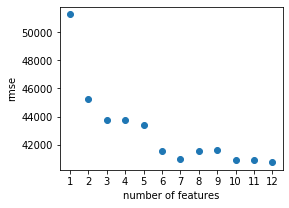

In [56]:
rmses = []
prediction_ls =[]

for i in range(1,len(feature12)+1):  # as seen earlier, adding more than 12 features made not more improvement
    t_col = feature12[0:i]
    rmse, predictions = train_test(train,t_col)
    rmses.append(round(rmse,1))
    prediction_ls.append(predictions)
    
x_lim = len(feature12)+1
plt.figure(figsize = (4,3))
plt.scatter(np.arange(1, x_lim, 1), rmses)
plt.xticks(np.arange(1, x_lim, 1)) 
plt.xlabel('number of features')
plt.ylabel('rmse')

### Model validation
The pattern above very similar to the one using randomized data during each run, suggesting that 50:50 split is a good choice. Below, comparison will be made between predictions for the training and testing data sets for models trained with 3, 7 and 12 features. 

In [57]:
# Parameters predicted in the final model using three features
te_rmse3 = rmses[2]
te_pred3 = prediction_ls[2]

# Parameters predicted in the final model using seven features
te_rmse7 = rmses[6]
te_pred7 = prediction_ls[6]

# Parameters predicted in the final model using 12 features
te_rmse12 = rmses[11]
te_pred12 = prediction_ls[11]

In [58]:
# Predict training data using three features
time1 = datetime.datetime.now()
lr = linear_model.LinearRegression()
lr.fit(train[feature3], train['SalePrice'])
tr_pred3 = lr.predict(train[feature3])
mse = mean_squared_error(train['SalePrice'], tr_pred3)
tr_rmse3 = np.sqrt(mse)
time2 = datetime.datetime.now() 
elapsedTime = time2 - time1
lrt3 = divmod(elapsedTime.total_seconds(), 60)

# Predict training data using seven features
time1 = datetime.datetime.now()
lr = linear_model.LinearRegression()
lr.fit(train[feature7], train['SalePrice'])
tr_pred7 = lr.predict(train[feature7])
mse = mean_squared_error(train['SalePrice'], tr_pred7)
tr_rmse7 = np.sqrt(mse)
time2 = datetime.datetime.now() 
elapsedTime = time2 - time1
lrt7 = divmod(elapsedTime.total_seconds(), 60)

# Predict training data using 12 features
time1 = datetime.datetime.now()
lr = linear_model.LinearRegression()
lr.fit(train[feature12], train['SalePrice'])
tr_pred12 = lr.predict(train[feature12])
mse = mean_squared_error(train['SalePrice'], tr_pred12)
tr_rmse12 = np.sqrt(mse)
time2 = datetime.datetime.now() 
elapsedTime = time2 - time1
lrt12 = divmod(elapsedTime.total_seconds(), 60)
print('3 feature elapsedTime:', lrt3)
print('7 feature elapsedTime:', lrt7)
print('12 feature elapsedTime:', lrt12)

3 feature elapsedTime: (0.0, 0.015623)
7 feature elapsedTime: (0.0, 0.0)
12 feature elapsedTime: (0.0, 0.015622)


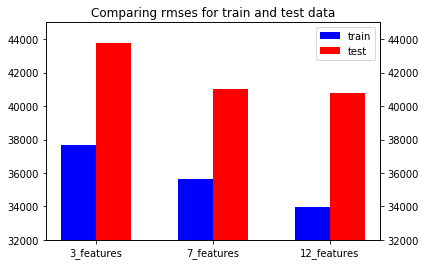

In [59]:
# plot rmses for train and test data
x = np.arange(3)
ax1 = plt.subplot(1,1,1)
w = 0.3
plt.xticks(x + w /2, ['3_features', '7_features', '12_features'])
tr = ax1.bar(x, [tr_rmse3,tr_rmse7,tr_rmse12], width=w, color='b', align='center')
plt.ylim(32000,45000)
ax2 = ax1.twinx()
te = ax2.bar(x+w, [te_rmse3,te_rmse7,te_rmse12],width=w,color='r',align='center')
plt.ylim(32000,45000)
plt.title('Comparing rmses for train and test data')
plt.legend([tr, te],['train', 'test'])

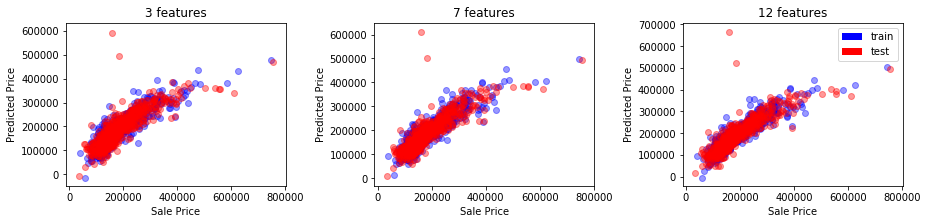

In [60]:
# compare predicted values baesd on train and test data, respectively
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x = train['SalePrice'], y = tr_pred3, color = 'blue', label='Train', alpha = 0.4)
ax1.scatter(x = test['SalePrice'], y = te_pred3, color = 'red', label='Test', alpha = 0.4)
ax1.set_xlabel('Sale Price')
ax1.set_ylabel('Predicted Price')
plt.title('3 features')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x = train['SalePrice'], y = tr_pred7, color = 'blue', label='Train', alpha = 0.4)
ax2.scatter(x = test['SalePrice'], y = te_pred7, color = 'red', label='Test', alpha = 0.4)
ax2.set_xlabel('Sale Price')
ax2.set_ylabel('Predicted Price')
plt.title('7 features')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x = train['SalePrice'], y = tr_pred12, color = 'blue', label='Train', alpha = 0.4)
ax3.scatter(x = test['SalePrice'], y = te_pred12, color = 'red', label='Test', alpha = 0.4)
ax3.set_xlabel('Sale Price')
ax3.set_ylabel('Predicted Price')
plt.title('12 features')
plt.legend([tr, te],['train', 'test'])

Text(0.5, 1.0, 'differences between train and test prediction rmses')

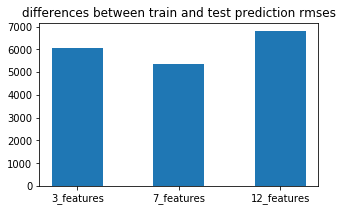

In [61]:
# calculate difference between train and test prediction rmses
delta1, delta2, delta3 = te_rmse3-tr_rmse3,te_rmse7-tr_rmse7,te_rmse12-tr_rmse12
plt.figure(figsize=(5,3))
plt.bar(x=['3_features', '7_features', '12_features'], height =[delta1, delta2, delta3], width=0.5)
plt.title('differences between train and test prediction rmses')

### Checking with alternative models: prediction using decision tree


 elapsedTime(min,sec): (0.0, 0.09377)


Text(0, 0.5, 'score')

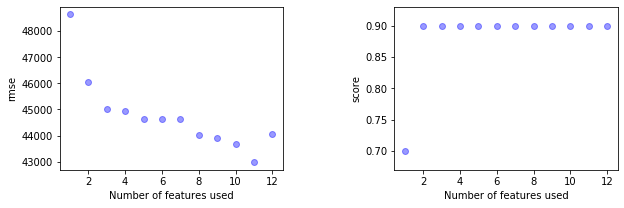

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score
def dt_train_test(train, features):
    reg = DecisionTreeRegressor(min_samples_leaf=5)
    reg.fit(train[features], train['SalePrice'])
    dt_pred_te = reg.predict(test[features])
    dt_pred_tr = reg.predict(train[features])
    mse = np.mean((dt_pred_te - test['SalePrice']) ** 2)
    rmse = mse**0.5
    score = reg.score(train[features], train['SalePrice'])
    return rmse, score, dt_pred_te, dt_pred_tr

rmses =[]
scores = []
dt_te_pred = []
dt_tr_pred = []
time1 = datetime.datetime.now() 
for i in range(1,len(feature12)+1):
    t_col = feature12[0:i]
    rmse, score, dt_pred_te, dt_pred_tr = dt_train_test(train,t_col)
    rmses.append(rmse)
    dt_te_pred.append(dt_pred_te)
    dt_tr_pred.append(dt_pred_tr)
    score = round (score,1)
    scores.append(score)

time2 = datetime.datetime.now() 
elapsedTime = time2 - time1
dt12 = divmod(elapsedTime.total_seconds(), 60)
print('\n', 'elapsedTime(min,sec):', dt12)

# Plot rmse and scores
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(wspace = 0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x = np.arange(1,13,1), y = rmses, color = 'blue', alpha = 0.4)
ax1.set_xlabel('Number of features used')
ax1.set_ylabel('rmse')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x = np.arange(1,13,1), y = scores, color = 'blue', alpha = 0.4)
ax2.set_xlabel('Number of features used')
ax2.set_ylabel('score')

Looks like three features gave the least error with a high score using decision tree algorythm

### Prediction using random forest


 elapsedTime(min,sec): (0.0, 0.281186)


Text(0, 0.5, 'score')

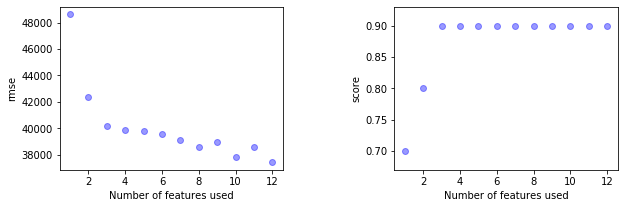

In [63]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.ensemble import RandomForestRegressor
def rf_train_test(train, features, n):
    reg = RandomForestRegressor(n_estimators=n,min_samples_leaf=5)
    reg.fit(train[features], train['SalePrice'])
    rf_pred_tr = reg.predict(train [features])
    rf_pred_te = reg.predict(test[features])
    mse = np.mean((rf_pred_te - test['SalePrice']) ** 2)
    rmse = mse**0.5
    score = reg.score(train[features], train['SalePrice'])
    return rmse, score, rf_pred_tr, rf_pred_te 

time1 = datetime.datetime.now() 
rmses =[]
scores = []
rf_te_pred = []
rf_tr_pred = []
for i in range(1,len(feature12)+1):
    t_col = features[0:i]
    rmse, score, rf_pred_tr, rf_pred_te = rf_train_test(train,t_col,10)
    rmse = round(rmse,1)
    rmses.append(rmse)
    score = round(score, 1)
    scores.append(score)
    rf_te_pred.append(rf_pred_te)
    rf_tr_pred.append(rf_pred_tr)

time2 = datetime.datetime.now() 
elapsedTime = time2 - time1
rf12 = divmod(elapsedTime.total_seconds(), 60)
print('\n', 'elapsedTime(min,sec):', rf12)

# Plot rmse and scores
fig = plt.figure(figsize = (10,3))
fig.subplots_adjust(wspace = 0.5)
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(x = np.arange(1,13,1), y = rmses, color = 'blue', alpha = 0.4)
ax1.set_xlabel('Number of features used')
ax1.set_ylabel('rmse')

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x = np.arange(1,13,1), y = scores, color = 'blue', alpha = 0.4)
ax2.set_xlabel('Number of features used')
ax2.set_ylabel('score')

Looks like 8 features gave the least error with a good score using random forest algorythm

Text(0.5, 1.0, 'Linear regression(7 features)')

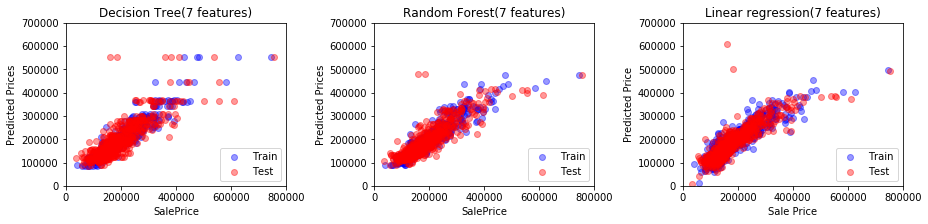

In [64]:
# Compare predicted prices by decision tree and random forest to actual SalePrice
fig = plt.figure(figsize = (15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x = train['SalePrice'], y = dt_tr_pred[6], color = 'blue', label='Train', alpha = 0.4)
ax1.scatter(x = test['SalePrice'], y = dt_te_pred[6], color = 'red', label='Test', alpha = 0.4)
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('Predicted Prices')
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.set_xlim(0, 800000)
ax1.set_ylim(0, 700000)
ax1.legend(loc='lower right')
plt.title('Decision Tree(7 features)')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x = train['SalePrice'], y = rf_tr_pred[6], color = 'blue', label='Train', alpha = 0.4)
ax2.scatter(x = test['SalePrice'], y = rf_te_pred[6], color = 'red', label='Test', alpha = 0.4)
ax2.set_xlabel('SalePrice')
ax2.set_ylabel('Predicted Prices')
ax2.set_xlim(0, 800000)
ax2.set_ylim(0, 700000)
ax2.legend(loc='lower right')
plt.title('Random Forest(7 features)')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x = train['SalePrice'], y = tr_pred7, color = 'blue', label='Train', alpha = 0.4)
ax3.scatter(x = test['SalePrice'], y = te_pred7, color = 'red', label='Test', alpha = 0.4)
ax3.set_xlabel('Sale Price')
ax3.set_ylabel('Predicted Price')
ax3.set_xlim(0, 800000)
ax3.set_ylim(0, 700000)
ax3.legend(loc='lower right')
plt.title('Linear regression(7 features)')

In [65]:
print(dt12, rf12, lrt12)

(0.0, 0.09377) (0.0, 0.281186) (0.0, 0.015622)


Text(0, 0.5, 'elapsed Time')

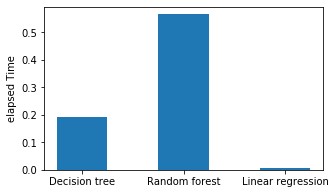

In [617]:
plt.figure(figsize=(5,3))
plt.bar(x=['Decision tree', 'Random forest', 'Linear regression'], height =[dt12[1], rf12[1], lrt12[1]], width=0.5)
plt.ylabel('elapsed Time')